Lab 5 Pivot tables, correlation and cross tables

Import all the necessary libraries here:

In [2]:
print(5)

5


In [4]:
import pandas as pd
import numpy as np

Challenge 1
Read the employees dataset
Save your data in a variable called employees.

In [5]:
employees = pd.read_csv(r'C:\Users\anato\IRONHACK\DAFT_1022\module_2\Lab_5_ Pivot-Tables-and-Crosstab\Employee.csv')
employees.head(20)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


What's the mean Salary by Department?
Tip: There are 2 ways to do it: with or without pivot tables. Do it both ways.

In [6]:
employees.groupby(by='Department').agg('mean')['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [7]:
employees.pivot_table(index = 'Department', values = 'Salary', aggfunc = np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


Now, group the data by more than one column. Use Pandas pivot table function to select the mean Salary by Department and Title.

In [8]:
employees.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

Display the number of Years of work experience and the Salary for each Title. Add Years as a column in your pivot table.
Hint: Use Pandas documentation to explore the pivot table function.

In [9]:
employees.pivot_table(index = 'Title', values = ['Salary', 'Years'], aggfunc = np.min)

,Salary,Years
Title,,
VP,70,8
analyst,30,1
associate,55,2


Find the mean Salary and number of employees in each Department and for each job Title.

In [10]:
employees.pivot_table(index = [ 'Department', 'Title'], values = ['Salary', 'Name'], aggfunc = {'Salary' : np.mean, 'Name' : (lambda x : x.size)})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

For each Department and each job Title, find the Salary median, minimum, maximum and standard deviation. Comment your results.

In [11]:
employees.pivot_table(index = [ 'Department', 'Title'], values = 'Salary', aggfunc = [np.mean, np.min, np.max, np.std])

mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

Based on your comments, fill the missing values with an appropriate value.

In [12]:
employees.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = [np.mean, np.min, np.max, np.std], fill_value="-")

mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

The stake holders want to know, for each Department, the number of employees and how much money is spent on salaries. Could you provide that information?

In [13]:
employees.pivot_table(index = 'Department', values = ['Salary', 'Name'], aggfunc = {'Salary' : np.sum, 'Name' : len})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


For each Department and Title, find the the total years of work experience and the mean Salary.

In [14]:
employees.pivot_table(index = ['Department', 'Title'], values = ['Salary', 'Years'], aggfunc = {'Salary' : np.mean, 'Years' : np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

Bonus Challenge 1
Compute the mean Salary after removing the maximum Salary for each Department. Create the appropriate pivot table.

In [21]:
employees.pivot_table(index = 'Department', values = 'Salary', aggfunc = (lambda array : (np.sum(array) - np.max(array))/(array.size-1)))

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


Challenge 2
Read the fitbit dataset
Save your data in a variable called fitbit.

In [23]:
fitbit = pd.read_csv(r'C:\Users\anato\IRONHACK\DAFT_1022\module_2\Lab_5_ Pivot-Tables-and-Crosstab\fitbit.csv')
fitbit.head(2)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491


fitbit.info()Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [24]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [28]:
fitbit[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


Use matplotlib to visually plot Minutes Very active vs Steps. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments.

In [29]:
import matplotlib.pyplot as plt;

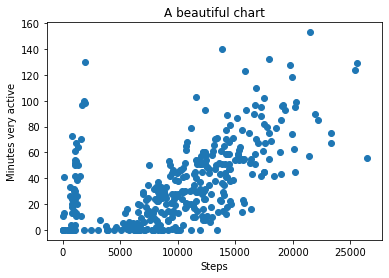

In [30]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Very Active'])
plt.title('A beautiful chart')
plt.xlabel('Steps')
plt.ylabel('Minutes very active')
plt.show()